In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
#pandas 이용 species의 고유값 출력
print(pd.unique(fish['Species']))
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', "Width"]]
fish_input.head()

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish_target = fish['Species']
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [4]:
#k-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3) #최근접 이웃 개수 k = 3
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [5]:
print(kn.classes_) #정렬된 타깃값

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [6]:
print(kn.predict(test_scaled[:5])) #test 세트에 있는 처음 5개 샘플값

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [7]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) #predict_proba : 클래스별 확률값
print(np.round(proba, decimals=4)) # decimals : 소수점 아래 자릿수 지정
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target.iloc[indexes[0]])

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


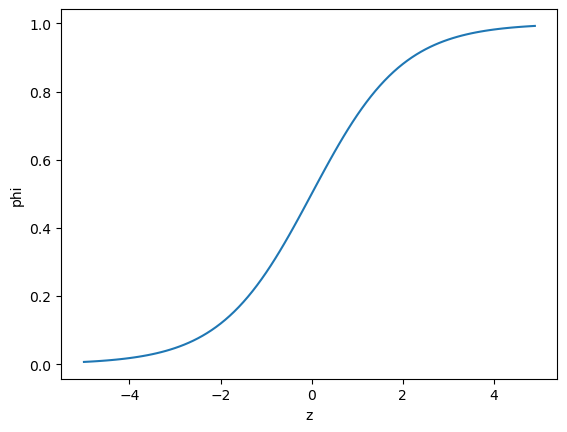

In [8]:
#로지스틱 회귀(분류 모델)
#z 값이 0 ~ 1 값을 갖도록
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()




In [9]:
#이진 분류 수행
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [10]:
bream_smelt_indexes = (train_target == 'Bream')|(train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [13]:
print(lr.predict_proba(train_bream_smelt[:5]))
# tarin_bream_smelt에 있는 처음 5개의 샘플 예측 확률 출력
# 샘플마다 두 개의 확률 출력(음성 클래스(0), 양성 클래스(1))
# classes_속성 확인을 통해 각각의 클래스가 어떤 샘플을 의미하는지 출력
print(lr.classes_)

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]
['Bream' 'Smelt']


In [14]:
print(lr.coef_, lr.intercept_)
# z = -0.405 x (Weight) -0.576 x(Length) -0.662 x(Diagonal) -1.013 x(Height) -0.731 x(Width) -2.162

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [15]:
#처음 5개 샘플의 z값 출력
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
#시그모이드 함수를 이용해 얻은 확률
from scipy.special import expit
print(expit(decisions))

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [16]:
# 다중 분류
lr = LogisticRegression(C=20, max_iter=100)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))

0.9327731092436975


In [17]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [18]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [19]:
# 세 번째 열이 perch인지 확인
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [20]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [21]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [22]:
from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [23]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [24]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_target = fish['Species']


In [25]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import SGDClassifier

In [27]:
sc = SGDClassifier(loss = 'log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/home/kdt_41/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [28]:
# 모델을 이어서 훈련 : partial_fit()
# fit() 메서드와 사용법이 같지만 호출마다 1 에포크씩 이어서 훈련
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


In [29]:
import numpy as np
sc = SGDClassifier(loss = 'log_loss', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [33]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

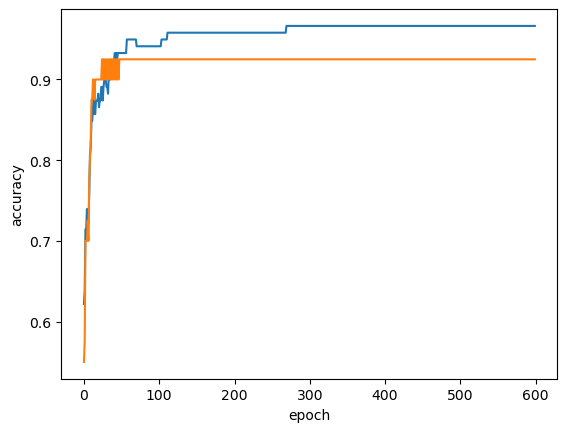

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)(sc))

In [ ]:
#SGDClassifier의 반복 횟수를 100에 맞추고 다시 모델 훈련
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
